**<font color='red'>Report Submission Information (must be completed before submitting report!)</font>**

* Student 1 Full Name and Number : Yi Jian 850509
* Student 2 Full Name and Number : Yue Chang 872301
* Workshop day : Thursday
* Workshop time : 11am

# <font color='blue'> Workshop 3 – Network Addressing, Graphs, and Routing [2 weeks] </font> 

## Objectives:

* Gain hands-on experience on network addressing, graphs, and routing protocols.
* Practical experience with IPv4 and MAC addresses, prefixes, and [CIDR](https://en.wikipedia.org/wiki/Classless_Inter-Domain_Routing) using python.
* Learn how to represent graphs and compute some basic centrality metrics.
* Program a basic routing protocol such as the Dijkstra’s algorithm.

> __Common objectives of all workshops:__
> Gain hands-on experience and learn by doing! Understand how theoretical knowledge discussed in lectures relates to practice. Develop motivation for gaining further theoretical and practical knowledge beyond the subject material.

## Overview:
In this workshop you will gain practical experience on networking and graph theory basics we have covered in the classroom such as network addressing, graphs, and routing protocols. Firstly, you will learn how to represent and manipulate network addresses using the *netaddr* python library.  Specifically, you will experiment with IPv4 and MAC addresses, subnets, masks, prefixes, and CIDR.  Secondly, you will learn how to program simple graphs in python using *networkx* library and compute basic centrality metrics such as degree and betweenness centrality. Finally, you will program a basic routing protocol such as the Dijkstra’s algorithm and find shortest paths on simple graphs. 

This workshop gives you a chance to implement the theory you have learned in the lectures and gain some practical experience on fundamentals of graphs and networking. The topics are relevant to Layers 2, 3 as well as the Application Layer, e.g. social networks. 

## Workshop Preparation: [before you arrive to the lab]

You can come to the workshops as you are or you can prepare beforehand to learn much more! 
We will give you a lot of time to finish the tasks but those are the bare minimums. Just like in the lectures, the topics we cover in the workshops are quite deep and we can only do so much in two hours. There is much more to learn and coming prepared to the workshop is one of the best ways to gain more knowledge! For example, there are a few questions in each workshop which you can answer beforehand.

> __Self-learning__ is one of the most important skills that you should acquire as a student. Today, self-learning is much easier than it used to be thanks to a plethora of online resources.
For this workshop, start by exploring the resource mentioned in the preparation steps below.

### Workshop Preparation Steps:

1. Common step for all workshops: read the Workshop Manual (in this case in form of Jupyter Notebook) beforehand!    
2. Review relevant lecture slides on addressing, graph theory, and routing.
3. Read Chapter 4 from Tanenbaum and Chapter 5 from Kurose-Ross.
4. Read [netaddr](https://netaddr.readthedocs.io/en/latest/index.html) and [networkx](https://networkx.github.io/documentation/stable/index.html) documentation.
5. Practice your Python skills.
6. [optional] read introductory material about network science and graph theory.
7. _\[optional\]_ _You can start with workshop tasks and questions_


## Tasks and Questions:

Follow the procedures described below, perform the given tasks and answer the workshop questions __preferably__ on the Python notebook itself! If you prefer, however, you can still provide answers as separate scripts and submit all in a zip file. The marks associated with each question are clearly stated. Keep your answers to the point and complete to get full marks! Ensure that your code is clean and appropriately commented. 

__The resulting notebook will be (part of) your Workshop Report!__

> __The goal is to learn__, NOT blindly follow the procedures in the fastest possible way! __Do not simply copy-paste answers (from Internet, friends, etc.). You can and should use all available resources but only to develop your own understanding. If you copy-paste, you will pay the price in the final exam!__

# Section 1: Network Addresses

Refer to the [netaddr library documentation](https://netaddr.readthedocs.io/en/latest/index.html) for the following exercises. First, however, we need to install relevant packages.

If you are using Anaconda, *networkx* should be already installed. **If not,** you can install simply by executing the following cell.

In [1]:
!pip install networkx

You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


The package *netaddr* is probably not installed. You can install it similarly by executing

In [2]:
!pip install netaddr

You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Ask for help from your demonstrator in case you need it.
Alternatively, you can install the needed packages by opening the terminal in Anaconda environment and typing
``` pip install networkx ```
and
``` pip install netaddr ```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from netaddr import *
import pprint  #this is optional

In netaddr library, *IPAddress* object represents a single IP address whereas IPNetwork objects are used to represent subnets, networks or VLANs that accept CIDR prefixes and netmasks. 

### Question 1.1. (1 point)
Represent your computer’s IPv4 address using the IPAddress object,
e.g. myip=IPAddress('10.100.144.45'). Now, referring to the library documentation, find its version, binary representation, and ipv6 mapping. Discuss your findings briefly.
> Hint: you can find your computer’s IP address from command line using ipconfig in windows and ifconfig in linux.

In [2]:
myip_v4 = IPAddress('10.13.84.5')
print('The vision is:',myip_v4.version)
print('The binary representation is:',myip_v4.bits())
myip_v6 = IPAddress('10.13.84.5').ipv6()
print('The ipv6 mapping is:',myip_v6)


The vision is: 4
The binary representation is: 00001010.00001101.01010100.00000101
The ipv6 mapping is: ::ffff:10.13.84.5


**Answer:** 

The vision is: 4

The binary representation is: 00001010.00001101.01010100.00000101

The ipv6 mapping is: ::ffff:10.13.84.5

IPv4 is 4 bytes(32 bits), and IPv6 is 16 bytes(128 bits). When do IPv6 mapping it just save the IPv4 4 bytes, and the other 12 bytes all '1'.

### Question 1.2. (1 point)

Represent the following subnetwork, 214.97.254/23, using *IPNetwork* object. Find, using netaddr library functions, its beginning IP address, prefix-length, size, broadcast, netmask, and hostmask. Find the broadcast, netmask, and hostmask bits in binary format. Discuss your findings briefly.

In [3]:
ip_2 = IPNetwork('214.97.254/23')
print('The beginning IP address is:',ip_2.ip)
print('The prefix-length is:',ip_2.prefixlen)
print('The size is:',ip_2.size)
print('The broadcast is:',ip_2.broadcast)
print('The netmask is:',ip_2.netmask)
print('The hostmask is:',ip_2.hostmask)
print('The broadcast in binary format is:',ip_2.broadcast.bits())
print('The netmask in binary format is:',ip_2.netmask.bits())
print('The hostmask in binary format is:',ip_2.hostmask.bits())

The beginning IP address is: 214.97.254.0
The prefix-length is: 23
The size is: 512
The broadcast is: 214.97.255.255
The netmask is: 255.255.254.0
The hostmask is: 0.0.1.255
The broadcast in binary format is: 11010110.01100001.11111111.11111111
The netmask in binary format is: 11111111.11111111.11111110.00000000
The hostmask in binary format is: 00000000.00000000.00000001.11111111


**Answer:** 

According to CIDR representation, the /23 means 23 bits(leftmost) are used in subnet portion. So the prefix length is 23. And there remains 9 bits for hosts, the total size of IP is 2^9 = 512. When broadcasting the host bits are all '1'. 

Next, we will investigate subnets, supernets, arbitrary IP address ranges and how to represent those using CIDR notation. You can apply these tools to example problems we have done in the lectures as well!

### Question 1.3. (1 point)

Create and list subnets and supernets with prefix-lengths of 26 and 20, that are contained within and contain the subnetwork, 214.97.254/23, respectively, using *subnet* and *supernet* functions. Explain/comment briefly.

In [4]:
ip_3 = IPNetwork('214.97.254/23')
subnets = list(ip_3.subnet(26))
supernets = list(ip_3.supernet(20))
print('The subnets are:',subnets)
print('The supernets are:',supernets)

The subnets are: [IPNetwork('214.97.254.0/26'), IPNetwork('214.97.254.64/26'), IPNetwork('214.97.254.128/26'), IPNetwork('214.97.254.192/26'), IPNetwork('214.97.255.0/26'), IPNetwork('214.97.255.64/26'), IPNetwork('214.97.255.128/26'), IPNetwork('214.97.255.192/26')]
The supernets are: [IPNetwork('214.97.240.0/20'), IPNetwork('214.97.248.0/21'), IPNetwork('214.97.252.0/22')]


**Answer:** 

We learned from last question,'214.97.254/23' size is 512, and /26 means 6 bits for hosts, so for each subnets the size is 64, that is we can divided into 8 subnets of prefix-length 26. For the prefix-length of 20, if we keep the 20 bits of prefix the same with '214.97.254/23', then those are the supernets for this IP, and for prefix-length 21,22 we can also see them as supernets, since their 20 bits(leftmost) are the same with '214.97.254/23', so the IP in contained in those networks too.

### Question 1.4. (2 points)

Create a subnet for the range of addresses between 192.0.2.1 and 192.0.2.33 using *IPRange* function. What are the CIDR subnetworks that cover this range of addresses? Can you cover this range with a superset of two CIDR subnetworks that differs from the original set by only one IP address? What is that extra IP address?

In [5]:
r1 = IPRange('192.0.2.1', '192.0.2.33')
print('The CIDR subnetworks are:',r1.cidrs())



The CIDR subnetworks are: [IPNetwork('192.0.2.1/32'), IPNetwork('192.0.2.2/31'), IPNetwork('192.0.2.4/30'), IPNetwork('192.0.2.8/29'), IPNetwork('192.0.2.16/28'), IPNetwork('192.0.2.32/31')]


**Answer:**

The CIDR superset that cover the range of addresses is '192.0.2.0/27' and '192.0.2.32/31', and the extra IP address is '192.0.2.0'.


Finally, we have a look at MAC addresses. The netaddr library EUI objects provide an interface to the **OUI** (Organisationally Unique Identifier) and **IAB** (Individual Address Block) registration databases available from the IEEE. Explain your findings and/or comment briefly.

### Question 1.5. (1 point)

Find the MAC address of your computer or mobile device (e.g. using ipconfig or device settings). Create an EUI object and find OUI (or IAB) details as well as registration information of your network device. 

> Note: the database installed with netaddr can be over one year old, so if your device is newer, it cannot find its registration!

In [6]:
mac = EUI('BC-83-85-E5-B3-C9')
oui = mac.oui
iab = mac.iab
print(oui)
print(iab)
print(oui.registration().address)
print(oui.registration().org)



BC-83-85
None
['One Microsoft Way', 'REDMOND  WA  98052', 'US']
Microsoft Corporation


**Answer:**

The information shown as above.

# Section 2: Graphs and Centrality Metrics

In this section, you will define simple graphs and compute some basic metrics using the networkx python library. 

Please refer to the [networkx library documentation](https://networkx.github.io/documentation/stable/index.html) for the following tasks.

In [2]:
import networkx as nx

We will first create and draw a simple undirected graph, which is predefined in the library using

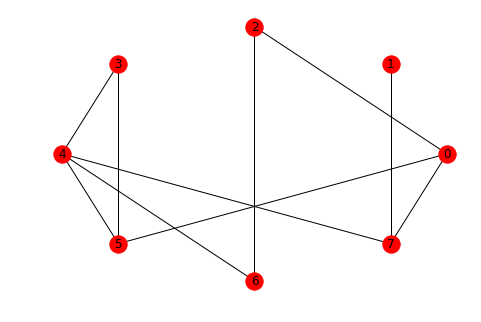

In [8]:
expmaze=nx.sedgewick_maze_graph()

plt.figure()
nx.draw_circular(expmaze, with_labels=True)

The networkx library provides multiple drawing options; feel free to experiment!

Next, let’s investigate some of the basic properties of this graph.

### Question 2.1. (1 point)

Find the list of nodes (vertices) and edges (links) of this graph. Find the list of node 4’s neighbours. What are the degrees of all the nodes and the mean degree of the graph?  

In [9]:
print('The nodes are:',expmaze.nodes)
print('The egdes are:',expmaze.edges)
print('The neighbours of node 4 are:',list(expmaze.neighbors(4)))
print('The degrees of all nodes are:',expmaze.degree)
print('The mean degree are:',nx.k_nearest_neighbors(expmaze))

The nodes are: [0, 1, 2, 3, 4, 5, 6, 7]
The egdes are: [(0, 2), (0, 7), (0, 5), (1, 7), (2, 6), (3, 4), (3, 5), (4, 5), (4, 7), (4, 6)]
The neighbours of node 4 are: [3, 5, 7, 6]
The degrees of all nodes are: [(0, 3), (1, 1), (2, 2), (3, 2), (4, 4), (5, 3), (6, 2), (7, 3)]
The mean degree are: {3: 2.7777777777777777, 1: 3.0, 2: 3.0, 4: 2.5}


**Answer:**

There are eight nodes in the graph, which are [0, 1, 2, 3, 4, 5, 6, 7];ten edges in the graph, which are [(0, 2), (0, 7), (0, 5), (1, 7), (2, 6), (3, 4), (3, 5), (4, 5), (4, 7), (4, 6)].

The neighbours of node 4 are node 3,5,6,7.

The degree of node 0 is 3,the degree of node 1 is 1,the degree of node 2 is 2,the degree of node 3 is 2,the degree of node 4 is 4,the degree of node 5 is 3,the degree of node 6 is 2, the degree of node 7 is 3.

The mean degree are shown as above too.



### Question 2.2. (1 point)

Find the adjacency matrix of this graph. Is the matrix symmetric? Why or why not?

In [10]:
A = nx.adjacency_matrix(expmaze)
print(A.todense())

[[0 0 1 0 0 1 0 1]
 [0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 0]
 [0 0 0 0 1 1 0 0]
 [0 0 0 1 0 1 1 1]
 [1 0 0 1 1 0 0 0]
 [0 0 1 0 1 0 0 0]
 [1 1 0 0 1 0 0 0]]


**Answer:**
Yes, it is a symmetric matrix, because it is a non-directed graph.

**Centrality** is an important concept in network science and there are various centrality metrics that aim to address the question “Which are the most important or central vertices in a network?” 

### Question 2.3. (1 point)

Find the **degree_centrality**  of the graph using the respective function provided in networkx library. How does it relate to the degrees of the nodes? 

> Hint: check the lecture notes as well as function documentation.

In [11]:
print(nx.degree_centrality(expmaze))

{0: 0.42857142857142855, 1: 0.14285714285714285, 2: 0.2857142857142857, 3: 0.2857142857142857, 4: 0.5714285714285714, 5: 0.42857142857142855, 6: 0.2857142857142857, 7: 0.42857142857142855}


**Answer：**

The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in the graph.

In this graph, there are 8 nodes in total. For example, node 1 has a degree of 3, so its centrality is 3/7=0.42857142857142855.

Centrality means the node that are connected to most other nodes,which is the similar to say the node that have most neighbors(highest degree) and from the last question, we can see that the degree of node 4 is the highest, which matches the result here, the centrality of node 4 is highest.

### Question 2.4. (2 points)

Find the eigenvector centrality, Katz centrality, and betweenness centrality of the graph. Provide brief definitions of each metric. Which node(s) seem(s) most important according to these metrics? Discuss briefly.

In [58]:
print('The eigenvector centrality: ',nx.eigenvector_centrality(expmaze))
print('The Katz centrality: ',nx.katz_centrality(expmaze))
print('The betweenness centrality: ',nx.betweenness_centrality(expmaze))

The eigenvector centrality:  {0: 0.37603370644310635, 1: 0.1324777700205187, 2: 0.23203108991568766, 3: 0.3448232725165962, 4: 0.5132763938815256, 5: 0.44437659241176525, 6: 0.2683649217121724, 7: 0.36791824160734143}
The Katz centrality:  {0: 0.3689096296618003, 1: 0.29844177704657576, 2: 0.3319790026501636, 3: 0.3391626565625621, 4: 0.403137032822609, 5: 0.37269988216615, 6: 0.3350905798439512, 7: 0.36862780544753904}
The betweenness centrality:  {0: 0.21428571428571427, 1: 0.0, 2: 0.047619047619047616, 3: 0.0, 4: 0.3571428571428571, 5: 0.09523809523809523, 6: 0.07142857142857142, 7: 0.30952380952380953}


**Answer:**

Eigenvector centrality is a measure of the influence a node has on a network. If a node is pointed to by many nodes then that node will have high eigenvector centrality.The eigenvector centrality for node i is the i-th element of the vector x defined by the equation:
$$Ax=λx$$ 
where A is the adjacency matrix of the graph with eigenvalue λ.
Reference:https://en.wikipedia.org/wiki/Eigenvector_centrality
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html#networkx.algorithms.centrality.eigenvector_centrality

Katz centrality computes the relative influence of a node within a network by measuring the number of the immediate neighbors (first degree nodes) and also all other nodes in the network that connect to the node under consideration through these immediate neighbors. It is a generalization of the eigenvector centrality. The Katz centrality for node i is:
$$x_{i}=\alpha \sum_{j} A_{i j} x_{j}+\beta$$
where A is the adjacency matrix of graph G with eigenvalues λ.
The parameter β controls the initial centrality, the default value is 1.0 and $\alpha<\frac{1}{\lambda_{\max }}$, the default value is 0.1.
Reference:https://en.wikipedia.org/wiki/Katz_centrality
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.katz_centrality.html?highlight=katz%20centrality

The betweenness centrality for each vertex is the number of these shortest paths that pass through the vertex.Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v 
$$c_{B}(v)=\sum_{s, t \in V} \frac{\sigma(s, t | v)}{\sigma(s, t)}$$
where V is the set of nodes, σ(s,t) is the number of shortest (s,t) -paths, and σ(s,t|v) is the number of those paths passing through some node v other than s,t. If s=t, σ(s,t)=1, and if v∈s,t, σ(s,t|v)=0.
Reference:
https://en.wikipedia.org/wiki/Betweenness_centrality
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html?highlight=betweenness%20centrality

The node 4 is most important because it has the largest centrality in all these matrics.

### *Optional* Bonus (1 point)

Create a directed graph and find the pagerank of its nodes. Discuss how you can apply this to web pages and http links. 

{1: 0.23276180708285304, 2: 0.2533475360204251, 3: 0.23854330245041536, 4: 0.030000000000000006, 5: 0.24534735444630643}


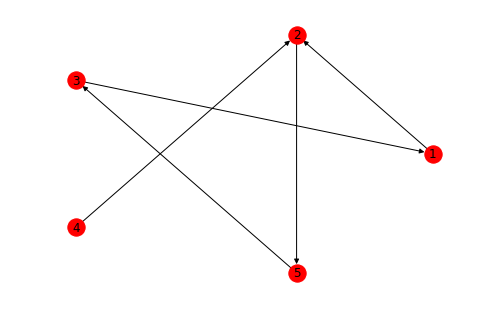

In [12]:
DG = nx.DiGraph()
DG.add_edges_from([(1, 2), (3, 1),(4, 2),(5, 3),(2, 5)])
plt.figure()
nx.draw_circular(DG, with_labels=True)
print(nx.pagerank(DG))


**Answer:**

The pagebank is to give each page a relative score of importance and authority by evaluating the quality and quantity of its links.Its purpose is to determine the relative importance of a given webpage in a network. So it is useful for a search engine.

# Section 3: Routing and Dijskstra’s Algorithm	

In this section, you will implement Dijkstra’s shortest path routing algorithm as discussed during lectures for simple graphs and check your answers using the networkx python library.

Let's create a graph representing a network first!

{('u', 'v'): Text(0.5,1.5,'2'),
 ('u', 'w'): Text(1,1.5,'5'),
 ('u', 'x'): Text(0.5,0.5,'1'),
 ('v', 'w'): Text(1.5,2,'3'),
 ('v', 'x'): Text(1,1,'2'),
 ('w', 'y'): Text(2,1,'1'),
 ('w', 'z'): Text(2.5,1.5,'5'),
 ('x', 'w'): Text(1.5,1,'3'),
 ('x', 'y'): Text(1.5,0,'1'),
 ('y', 'z'): Text(2.5,0.5,'2')}

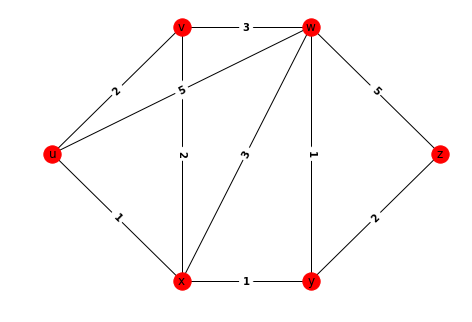

In [4]:
# Create the graph
G = nx.Graph()
G.add_nodes_from(['u', 'v', 'x', 'w', 'y', 'z'])
G.add_weighted_edges_from([('u', 'v', 2), ('u', 'w', 5), ('u', 'x', 1), ('x', 'v', 2),
                           ('x', 'w', 3), ('x', 'y', 1), ('v', 'w', 3), ('y', 'w', 1),
                           ('y', 'z', 2), ('w', 'z', 5)])

# get labels and set positions
Glabels = nx.get_edge_attributes(G, 'weight')
pos = {'u': [0, 1], 'v': [1, 2], 'x': [1, 0], 'y': [2, 0], 'w': [2, 2], 'z': [3, 1]}

# Draw the graph
plt.figure()
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=Glabels, font_weight='bold')

Take the pseudocode of the Dijkstra’s algorithm provided in the lectures as a reference. Before you write your own implementation of the algorithm, here are a few useful **hints**: 

* You can rely on networkx library functions to access the properties of the graph defined in graph_for_routing.py . For example: G[‘u’], G.nodes(), G.edges(), etc.
* You can use python list as an ordered data structure to store the list of previous nodes.

### Question 3.1. (8 points)

Write your own implementation of Dijkstra’s algorithm in the form of a function, e.g. *mydijkstra(inputgraph,sourcenode)*. 

You can use the graph G in the provided above as the input. Your function should return 
1. the list of the distance of all nodes in the inputgraph to the given sourcenode (distance to self is zero)

2. the list of previous node(s) as part of the shortest path solution as discussed in lectures. Fully comment your code to demonstrate your understanding of the algorithm. 

Provide the full source code of your script along with your function below (or as a separate file).

> Note that although you can find many variants online, it is important that you write your own code in your own style. There are many ways of implementing Dijkstra’s algorithm depending on the data structures used. Do not worry about efficiency of your code for this exercise. 

In [18]:
def mydijkstra(inputgraph,sourcenode):
    cost = {}   #save the node and its corresponding shortest distance in one dictionary
    path = []   #save the shortest path
    predecessor = {}  #predecessor and current node in one dictionary  
    unknown_node = list(inputgraph.nodes)    #nodes that still does not find the shortest path 

     
    #initialization
    for item in unknown_node:
         cost[item]= 999999
         cost[sourcenode]=0
    
    ####first, find the shortest distance
    while unknown_node != []:   # iterate until find all shortest distance for all nodes
        pre_Node = None         # we store the current processing node as pre_node
        for item in unknown_node:
            if pre_Node is None:
               pre_Node = item
            elif cost[item] < cost[pre_Node]:  
                pre_Node = item
    
        for childNode,weight in inputgraph[pre_Node].items():   # check the adjacent node and corresponging weight of current node
            for value in weight.values(): 
                #compare the distance from parent node + shortest distance of this parent node with current distance
                #choose smaller one and update
                if value + cost[pre_Node] < cost[childNode]:             
                    cost[childNode] =  value + cost[pre_Node]  
                    predecessor[childNode] = pre_Node    #save the current node as predecessor
        unknown_node.remove(str(pre_Node))

    #print the cost
    for item, value in cost.items():
        print('The shortest distance from source node to',item,'is',value)
            
    ####second, find the shortest path 
    goal = list(inputgraph.nodes) 
    goal.remove(sourcenode)    #store the goal node (without source node) in one list
    for item in goal:
        dest = item   #for print
        while item != sourcenode:
                path.insert(0,item)  
                item = predecessor[item]  #find the predecessor of the node to find the path
        print('Path from source node to',dest,'is',path)
        path=[]    #delete the path and search for next node 

mydijkstra(G,'u')
    


The shortest distance from source node to u is 0
The shortest distance from source node to v is 2
The shortest distance from source node to x is 1
The shortest distance from source node to w is 3
The shortest distance from source node to y is 2
The shortest distance from source node to z is 4
Path from source node to v is ['v']
Path from source node to x is ['x']
Path from source node to w is ['x', 'y', 'w']
Path from source node to y is ['x', 'y']
Path from source node to z is ['x', 'y', 'z']


### Hints and Suggestions

* Note that ```G[anode]``` returns a dictionary of anode’s neighbours and weights of respective links 
and ```G.nodes()``` returns the list of nodes in graph G.
* You can convert a dictionary to a list and vice versa by using, e.g.

```outputlist=[(item,itemval) for item,itemval in inputdict.items()]``` 

This is called list comprehension which is an elegant feature of python.

```outputdict=dict([(item1,itemval1), (item2,itemval2), …])```
* Another neat trick with list comprehension is on the fly filtering, e.g.

```[(n,nval) for n,nval in InputDict.items() if n in AnotherList]```

### Question 3.2. (1 pt)

Check your answer using the (single source) Dijsktra functions provided by the networkx library.

In [19]:
print(nx.single_source_dijkstra_path(G,'u'))
print(nx.single_source_dijkstra_path_length(G,'u'))

{'u': ['u'], 'v': ['u', 'v'], 'w': ['u', 'x', 'y', 'w'], 'x': ['u', 'x'], 'y': ['u', 'x', 'y'], 'z': ['u', 'x', 'y', 'z']}
{'u': 0, 'x': 1, 'v': 2, 'y': 2, 'w': 3, 'z': 4}


**Answer:**

We can see that our answers from our function are same with that from functions provided by library. 

### *Optional* Bonus (1 point)

Further test your algorithm with two other small (but larger than 8 node) weighted graphs. Check your answers using the networkx library functions.

The shortest distance from source node to a is 0
The shortest distance from source node to b is 2
The shortest distance from source node to c is 7
The shortest distance from source node to d is 2
Path from source node to b is ['b']
Path from source node to c is ['b', 'c']
Path from source node to d is ['d']
The shortest path using library functions: {'a': ['a'], 'b': ['a', 'b'], 'd': ['a', 'd'], 'c': ['a', 'b', 'c']}
The shortest distance using library functions: {'a': 0, 'b': 2, 'd': 2, 'c': 7}


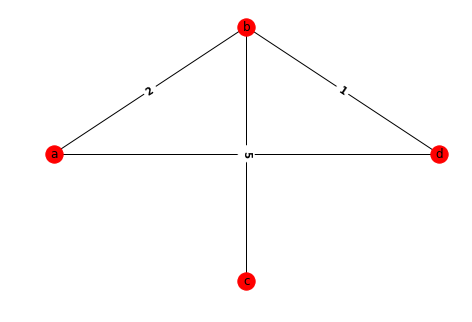

In [20]:
# Create the graph
G1 = nx.Graph()
G1.add_nodes_from(['a', 'b', 'c', 'd'])
G1.add_weighted_edges_from([('a', 'b', 2), ('b', 'c', 5), ('b', 'd', 1), ('a', 'd', 2)])

# get labels and set positions
Glabels1 = nx.get_edge_attributes(G1, 'weight')
pos1 = {'a': [0, 1], 'b': [1, 2], 'c': [1, 0], 'd': [2, 1]}

# Draw the graph
plt.figure()
nx.draw(G1, pos1, with_labels=True)
nx.draw_networkx_edge_labels(G1, pos1, edge_labels=Glabels1, font_weight='bold')

mydijkstra(G1,'a')
print('The shortest path using library functions:',nx.single_source_dijkstra_path(G1,'a'))
print('The shortest distance using library functions:',nx.single_source_dijkstra_path_length(G1,'a'))

The shortest distance from source node to e is 0
The shortest distance from source node to f is 2
The shortest distance from source node to g is 3
The shortest distance from source node to h is 1
The shortest distance from source node to j is 2
The shortest distance from source node to k is 4
Path from source node to f is ['f']
Path from source node to g is ['j', 'g']
Path from source node to h is ['h']
Path from source node to j is ['j']
Path from source node to k is ['h', 'k']
The shortest path using library functions: {'e': ['e'], 'f': ['e', 'f'], 'g': ['e', 'j', 'g'], 'h': ['e', 'h'], 'j': ['e', 'j'], 'k': ['e', 'h', 'k']}
The shortest distance using library functions: {'e': 0, 'h': 1, 'f': 2, 'j': 2, 'g': 3, 'k': 4}


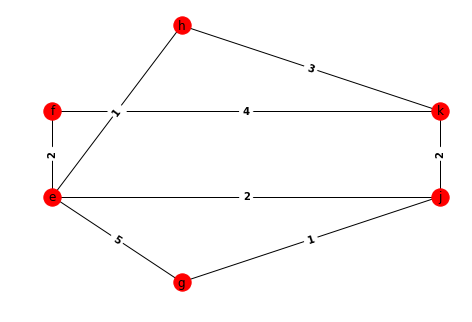

In [21]:
# Create the graph
G2 = nx.Graph()
G2.add_nodes_from(['e', 'f', 'g', 'h', 'j', 'k'])
G2.add_weighted_edges_from([('e', 'f', 2), ('e', 'g', 5), ('e', 'h', 1), ('e', 'j', 2), ('g', 'j', 1),('f', 'k', 4),('j', 'k', 2),('h', 'k', 3)])

# get labels and set positions
Glabels2 = nx.get_edge_attributes(G2, 'weight')
pos2 = {'e': [0, 1], 'f': [0, 2], 'g': [1, 0], 'h': [1, 3], 'j': [3, 1], 'k': [3, 2]}

# Draw the graph
plt.figure()
nx.draw(G2, pos2, with_labels=True)
nx.draw_networkx_edge_labels(G2, pos2, edge_labels=Glabels2, font_weight='bold')

mydijkstra(G2,'e')
print('The shortest path using library functions:',nx.single_source_dijkstra_path(G2,'e'))
print('The shortest distance using library functions:',nx.single_source_dijkstra_path_length(G2,'e'))

**Answer:**

We can see that our answers from our function are same with that from functions provided by library. 

# <font color='red'> Workshop Report Submission Instructions </font>

_You should ideally complete the workshop tasks and answer the questions within the respective session!_ The submission deadline is usually Friday, the week after. Submission deadlines will be announced on *Canvas*.

It is **mandatory to follow all of the submissions guidelines** given below. _Don't forget the Report submission information on top of this notebook!_

1. The completed Jupyter notebook and its pdf version (you can simply print-preview and then print as pdf from within your browser) should be uploaded to the right place in *Canvas* by the announced deadline. _It is your responsibility to follow the announcements!_ **Late submissions will be penalised (up to 100% of the total mark depending on delay amount)!**
2. Filename should be “ELEN90061 Workshop **W: StudentID1-StudentID2** of session **Day-Time**", where **W** refers to the workshop number, **StudentID1-StudentID2** are your student numbers, **Day-Time** is your session day and time, e.g. *Tue-14*.
3. Answers to questions, simulation results and diagrams should be included in the Jupyter notebook as text, code, plots. *If you don't know latex, you can write formulas/text to a paper by hand, scan it and then include as image within Markdown cells.*
4. One report submission per group. 
 
### Additional guidelines for your programs:

* Write modular code using functions. 
* Properly indent your code. But Python forces you do that anyway ;)
* Heavily comment the code to describe your implementation and to show your understanding. No comments, no credit!
* Make the code your own! It is encouraged to find and get inspired by online examples but you should exactly understand, modify as needed, and explain your code via comments. There will be no credit for blind copy/paste even if it somehow works (and it is easier to detect it than you might think)!